In [60]:
import MDAnalysis as mda
import MDAnalysis.transformations
import nglview as nv
import matplotlib.pyplot as plt
import numpy as np

In [17]:
nvt_path = "../nvt/"
universe = mda.Universe(nvt_path+"nvt.tpr", nvt_path+"nvt.xtc")

In [18]:
workflow = [mda.transformations.unwrap(universe.atoms)]
universe.trajectory.add_transformations(*workflow)

In [52]:
protein = universe.select_atoms("protein")

In [53]:
view = nv.show_mdanalysis(protein)
view

NGLWidget(max_frame=250)

In [46]:
pulling_path = "../pulling/"
universe = mda.Universe(pulling_path+"pulling.tpr", pulling_path+"pulling.xtc")

/Users/jasminguven/miniforge3/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:237: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [47]:
protein = universe.select_atoms("protein")

In [48]:
view = nv.show_mdanalysis(protein)

view

NGLWidget(max_frame=250)

In [34]:
test = "b"
float(test)

ValueError: could not convert string to float: 'b'

In [69]:
time = []
x1 = []
x2 = []
with open("../pulling_nvt/pulling_intermediate.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        new_line = line.split()
        # print(new_line)

        for i in range(len(new_line)):
            try:
                number = float(new_line[i])
                if i == 0:
                    time.append(number)
                elif i == 1: 
                    x1.append(number)
                else:
                    x2.append(number)

            except ValueError as e:
                print(e)
        



could not convert string to float: 't'
could not convert string to float: 'x1'
could not convert string to float: 'x2'


In [70]:
time = np.array(time)
x1 = np.array(x1)
x2 = np.array(x2)

(0.35, 0.6)

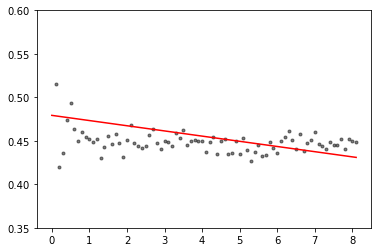

In [73]:
#find line of best fit
a1, b1 = np.polyfit(time, x1, 1)
a2, b2 = np.polyfit(time, x2, 1)

#add points to plot
# plt.scatter(x, y)

#add line of best fit to plot
plt.plot(time, a1*time+b1, color="red")        

plt.scatter(time, x1, label = "x1", marker='.', alpha=0.5, c='k')
# plt.plot(time, x2, label = "x2")
plt.ylim(0.35,0.6)


(0.3, 0.6)

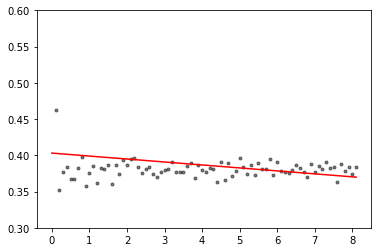

In [77]:
plt.plot(time, a2*time+b2, color="red")   
plt.scatter(time, x2, label = "x1", marker='.', alpha=0.5, c='k') 
plt.ylim(0.3,0.6)